# Financial Market Prediction Model

 Description: Develop a model to predict stock market trends using historical data. Use techniques like time 
series analysis, regression, and deep learning to build and evaluate the model.

 Technologies: Python, Data Analysis libraries (Pandas, NumPy), machine learning (scikit-learn,TensorFlow)

In [1]:
pip install pandas numpy scikit-learn tensorflow


     -------------------------------------- 376.9/376.9 MB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 127.7/127.7 kB ? eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 4.9 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 5.5/5.5 MB 5.3 MB/s eta 0:00:00
     -------------------------------------- 240.0/240.0 kB 2.9 MB/s eta 0:00:00
  Created wheel for gast: filename=gast-0.6.0-py3-none-any.whl size=21173 sha256=cdffe1285d68

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [4]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Intellipaat/Datasets/Bank_Stock_Prices.csv")

## Data Preprocessing 

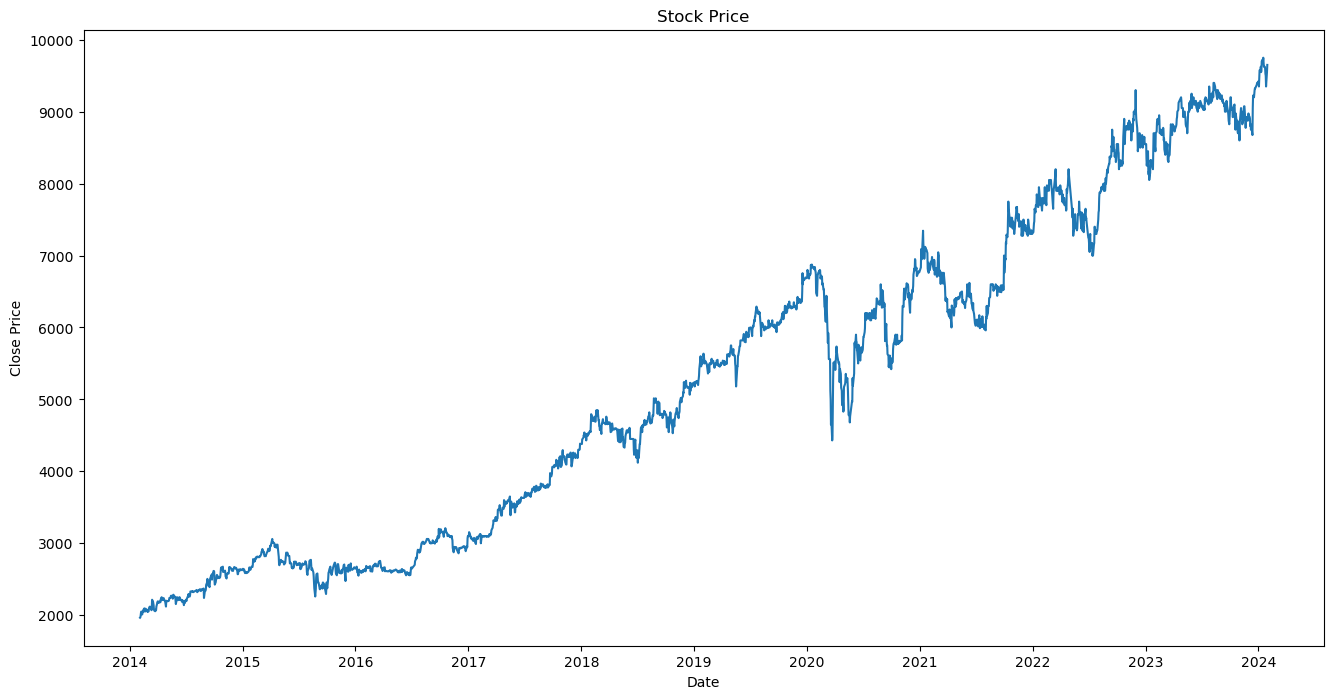

In [5]:
# Check for missing values
df.isnull().sum()

# Fill missing values (if any)
df = df.fillna(method='ffill')

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

# Plot the closing price
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


## Feature Engineering

In [6]:
data = df['Close'].values
data = data.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


## Build the LSTM Model:

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)


C:\Users\ASUS\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1885/1885 ━━━━━━━━━━━━━━━━━━━━ 64s 32ms/step - loss: 0.0019


## Make Predictions:

In [8]:
# Predict on the test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


## Evaluate the Model:

Train RMSE:  4868.215401228491
Test RMSE:  8660.576871087767


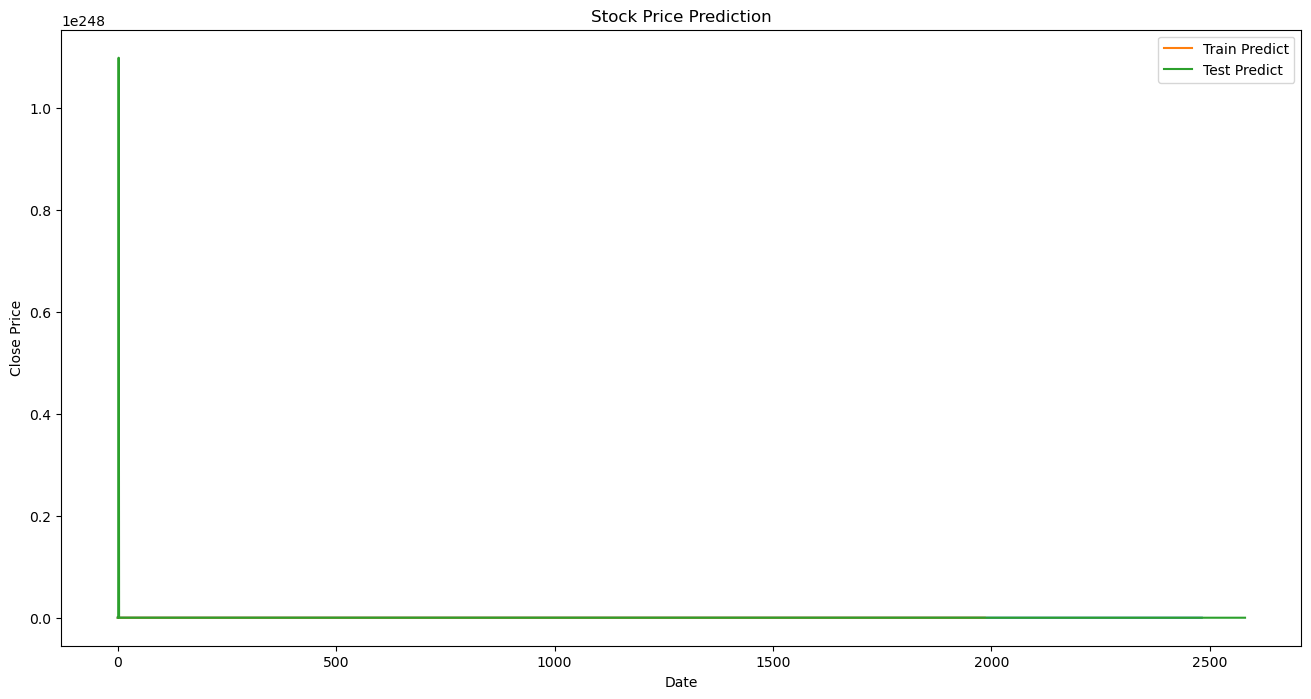

In [9]:
# Calculate RMSE
train_score = np.sqrt(mean_squared_error(Y_train, train_predict))
test_score = np.sqrt(mean_squared_error(Y_test, test_predict))
print('Train RMSE: ', train_score)
print('Test RMSE: ', test_score)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(np.concatenate((np.empty((time_step+1,1)), train_predict)), label='Train Predict')
plt.plot(np.concatenate((np.empty((len(train_data)+time_step*2,1)), test_predict)), label='Test Predict')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
